# [目標]

用 pytorch 實作一個超級簡單的 BasicRNN，這個 RNN 只會做一次向前傳播的運算，如下圖：



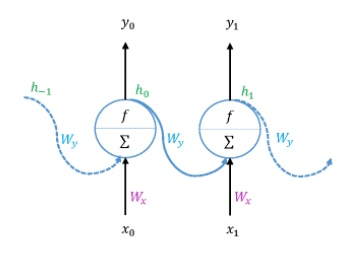

In [1]:
import numpy as np
import torch
from torch import nn

In [22]:
s = np.ndarray([2,2])
print(s)


x = torch.randn(3,5)
print(x)

y = torch.zeros(2,3)
print(y)

z = torch.ones(2,3)
print(z)

print(torch.is_tensor(x))

q = torch.as_tensor([[1,2], [4,5]])
print(q)

t=torch.as_tensor(s)
print(t)

t1=torch.as_tensor((2,3))
print(t1)

[[6.95177151e-310 0.00000000e+000]
 [4.94065646e-324 0.00000000e+000]]
tensor([[-0.4717, -0.4504,  1.0413,  1.0758,  0.4311],
        [-0.9814,  0.8984, -0.2108, -3.1520, -0.3487],
        [ 0.4830, -0.2787, -2.2041, -0.1616, -0.7839]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
True
tensor([[1, 2],
        [4, 5]])
tensor([[6.9518e-310,  0.0000e+00],
        [4.9407e-324,  0.0000e+00]], dtype=torch.float64)
tensor([2, 3])


# [步驟一]

我們需要定義一個 SingleRNN 的類別(class)

向前傳播的運算公式如下：

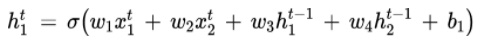

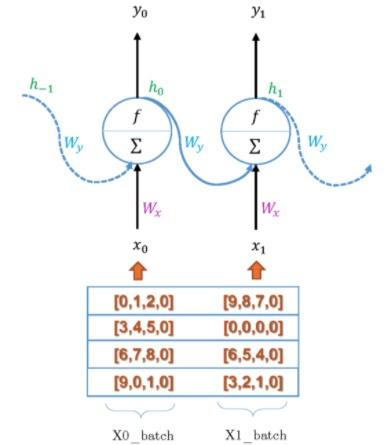

In [25]:
N_INPUT = 3 # 輸入的特徵維度，number of features in input
N_NEURONS = 5 # 神經元的數量，number of units in layer

N_BATCH_SIZE = 4
STEP = 10

# 建立 N 個時間點的 輸入值
# 每個 input 都是 4x3
X_batch = torch.randn(STEP, N_BATCH_SIZE, N_INPUT)
# print(X_batch)
# X_batch = torch.tensor([[[0,1,2], [3,4,5], 
#                          [6,7,8], [9,0,1]],
#                         [[9,8,7], [0,0,0], 
#                          [6,5,4], [3,2,1]]
#                        ], dtype = torch.float) 

# 建立一個 RNNCell 實例: An Elman RNN cell with tanh or ReLU non-linearity.
# 相當於 tanh
# parameter: input_size, hidden_size
# input_size – The number of expected features in the input x
# hidden_size – The number of features in the hidden state h
# Wx (輸入值的權重) 3x5
# Wy (輸出值的權重) 3x5
rnn = nn.RNNCell(N_INPUT, N_NEURONS) # 輸入的維度以及神經元的數量




# 起始值
hx = torch.randn(N_BATCH_SIZE, N_NEURONS)

output = []

# for each time step
for i in range(STEP):
    # rnn(input, hidden)
    # 說明 input: input of shape (batch, input_size): tensor containing input features
    # 說明 hidden: tensor containing the initial hidden state for each element in the batch
    hx = rnn(X_batch[i], hx)
    output.append(hx)

# input(4x3) * Wx(3x5) => tensor 4x5 
print(output)

[tensor([[ 0.5035,  0.2451,  0.0071, -0.6435,  0.7513],
        [-0.3569, -0.2731,  0.2298,  0.0076,  0.6048],
        [-0.2818, -0.0268,  0.4623,  0.0517,  0.8274],
        [-0.8945,  0.0562,  0.5286,  0.6531,  0.4780]], grad_fn=<TanhBackward>), tensor([[-0.1380,  0.1913,  0.5058,  0.5632, -0.1207],
        [-0.0154,  0.2565, -0.4113,  0.6437, -0.7177],
        [-0.2530, -0.1772,  0.1109, -0.2512,  0.2747],
        [ 0.0669, -0.0730, -0.5034, -0.2738,  0.0779]], grad_fn=<TanhBackward>), tensor([[-0.4349,  0.1075,  0.1116,  0.2074,  0.5198],
        [-0.4050, -0.0979,  0.2038,  0.2373,  0.4991],
        [-0.6819,  0.0152,  0.2550,  0.2859,  0.1740],
        [-0.2467, -0.3284, -0.1421,  0.5158, -0.6033]], grad_fn=<TanhBackward>), tensor([[ 0.7178,  0.6236, -0.3743,  0.7129, -0.5493],
        [-0.5148, -0.6495, -0.3914, -0.3948, -0.2507],
        [ 0.3487,  0.5010, -0.1465,  0.4389,  0.1935],
        [-0.2710,  0.4462, -0.4256,  0.8796, -0.6648]], grad_fn=<TanhBackward>), tensor([[ 0.001

In [34]:
INPUT_NUM = 10
BATCH_SIZE = 3

RNN_NUM = 7
# 3x10 * 10x7  => 3x7
STEP = 6


# 6 個時間點, 
input = torch.randn(STEP, BATCH_SIZE, INPUT_NUM)
input

rnn = nn.RNNCell(INPUT_NUM,RNN_NUM)

hx = torch.randn(BATCH_SIZE, RNN_NUM)
output = []
for i in range(STEP):
    hx = rnn(input[i], hx)
    output.append(hx)
    
print(output)

[tensor([[ 0.1641,  0.8885, -0.7782, -0.2051,  0.4027, -0.0971, -0.2993],
        [-0.0203,  0.6029,  0.8727, -0.5174, -0.6571,  0.4714,  0.6312],
        [-0.5932, -0.7456,  0.1350, -0.6235, -0.2204,  0.7245, -0.7107]],
       grad_fn=<TanhBackward>), tensor([[-0.4339,  0.7308,  0.8556, -0.1374, -0.4053,  0.0681,  0.9616],
        [ 0.7171,  0.5758,  0.8459, -0.6316,  0.3208,  0.8205, -0.5505],
        [-0.2145, -0.6030,  0.6328, -0.0218,  0.1712, -0.7309,  0.1990]],
       grad_fn=<TanhBackward>), tensor([[-0.4220,  0.5615, -0.6762, -0.7345, -0.0898,  0.6929, -0.8802],
        [-0.4593, -0.2898,  0.4082, -0.2674,  0.0984,  0.1546,  0.4549],
        [ 0.6913,  0.7130,  0.9494,  0.1343, -0.5129,  0.5014,  0.6023]],
       grad_fn=<TanhBackward>), tensor([[-0.0230, -0.4332,  0.7012,  0.1437, -0.9177, -0.9581,  0.2571],
        [-0.8910,  0.7601,  0.9252,  0.2181,  0.5391,  0.9720,  0.8644],
        [ 0.6793, -0.0953, -0.0156, -0.8331,  0.9386,  0.8725, -0.4544]],
       grad_fn=<TanhBac